In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import manifold
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.covariance import GraphLassoCV
%matplotlib inline

In [2]:
def convert_vote(val):
    if val == 'Nay':
        return -1
    elif val == 'Yea':
        return 1
    else:
        return 0

In [3]:
def convert_party(val):
    if val == 'Republican':
        return 'R'
    elif val == 'Democrat':
        return 'D'
    else:
        return 'I'

In [4]:
senatorIds = 
df1 = pd.read_csv('data/2015/1.csv', skiprows=1)
df1['party'] = df1['party'].apply(convert_party)
independents = df1[df1['party'] == 'I'].index.tolist()
republicans = df1[df1['party'] == 'R'].index.tolist()
democrats = df1[df1['party'] == 'D'].index.tolist()
df1.head()

,person,state,district,vote,name,party
0,300002,TN,NaN,Nay,Sen. Lamar Alexander [R],R
1,300011,CA,NaN,Not Voting,Sen. Barbara Boxer [D],D
2,300018,WA,NaN,Yea,Sen. Maria Cantwell [D],D
3,300019,DE,NaN,Nay,Sen. Thomas Carper [D],D
4,300023,MS,NaN,Nay,Sen. Thad Cochran [R],R


In [95]:
def clean_df(df):
    df['party'] = df['party'].apply(convert_party)
    df['vote'] = df['vote'].apply(convert_vote)
    return df

In [96]:
def gen_data(year):
    dirname = 'data/%d/' %year
    num_bills = len(os.listdir(dirname))
    num_senators = 100
    all_data = np.zeros((num_bills, num_senators))
    
    for i in range(num_bills):
        fname = dirname + '%d.csv' %(i+1)
        df = pd.read_csv(fname, skiprows=1)
        all_data[i, :] = df['vote'].apply(convert_vote)
    return all_data

In [135]:
all_data_bills = gen_data(2015)
all_data_senators = all_data_bills.T # each row is a senator

In [136]:
mds = manifold.MDS(n_components=2)
sim_bills = sklearn.metrics.pairwise.linear_kernel(all_data_bills)
sim_senators = sklearn.metrics.pairwise.linear_kernel(all_data_senators)
pos_bills = mds.fit(sim_bills).embedding_
pos_senators = mds.fit(sim_senators).embedding_

In [137]:
X_true_senators = all_data_senators - all_data_senators.mean()
X_true_bills = all_data_bills - all_data_bills.mean()

In [138]:
pos_senators *= np.sqrt((X_true_senators ** 2).sum()) / np.sqrt((pos_senators ** 2).sum())
pos_bills *= np.sqrt((X_true_bills ** 2).sum()) / np.sqrt((pos_bills ** 2).sum())

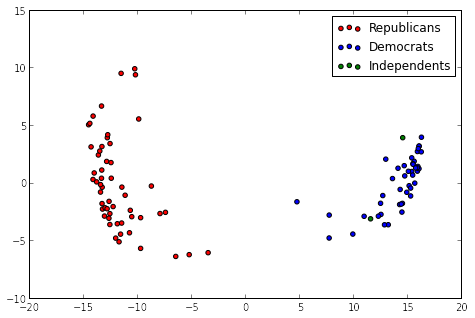

In [139]:
clf = PCA(n_components=2)
X_true_bills = clf.fit_transform(X_true_bills)
X_true_senators = clf.fit_transform(X_true_senators)

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

plt.scatter(X_true_senators[republicans, 0], X_true_senators[republicans, 1], c='r', s=20)
plt.scatter(X_true_senators[democrats, 0], X_true_senators[democrats, 1], c='b', s=20)
plt.scatter(X_true_senators[independents, 0], X_true_senators[independents, 1], c='g', s=20)
plt.legend(('Republicans', 'Democrats', 'Independents'), loc='best')

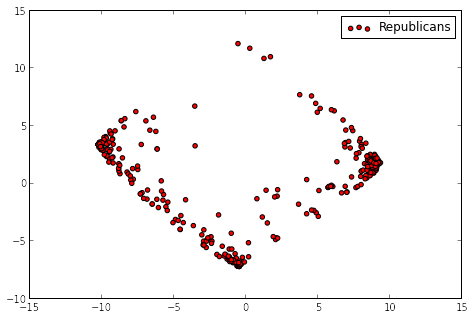

In [141]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

plt.scatter(X_true_bills[:, 0], X_true_bills[:, 1], c='r', s=20)
plt.legend(('Republicans', 'Democrats', 'Independents'), loc='best')